# Observations

1. There were more mice trated with Capomulin and Ramicane, in order to make a fair comparison between treatments a same number of mice should have been studied to lead to valid conclusions. 
2. An equal amount of female and male mice were compared so any conclusion by gender could be valid. We could analyze if a certain treatment works better on female or males.
3.Capomulin significantly reduced the volume of mouse b128. In the stats table capomulin seems to be the better treatment by having the least avg. size tumor with the least variance.
4.The correlation between mouse weight and tumor size has an r value of 0.84, which means it is a strong positive correlation. This leads to the assumption that the heavier the mouse, the bigger the tumor. 

In [43]:
 # Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [44]:
# Study data files # Read the mouse data
mouses_data = pd.read_csv('Resources/Homework 5 Matplotlib_Pymaceuticals_data_Mouse_metadata.csv')
study_data = pd.read_csv('Resources/Homework 5 Matplotlib_Pymaceuticals_data_Study_results.csv')
mouses_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [45]:
# Read the study results
study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [46]:
# Combine the data into a single dataset # Display the data table for preview
complete_data = pd.merge(study_data, mouses_data, on ='Mouse ID', how = 'left')
complete_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [47]:
 # Checking the number of mice.
unique_mice = complete_data['Mouse ID'].unique()
unique_mice

array(['b128', 'f932', 'g107', 'a457', 'c819', 'h246', 'p189', 'n923',
       'q119', 'f993', 'z234', 'b559', 'y260', 'x930', 'o725', 'z969',
       'v835', 'r604', 'n304', 'l700', 'x336', 'l725', 'm133', 'v295',
       'a818', 'y601', 't724', 'k382', 'w422', 'c326', 'c139', 'v339',
       'a577', 'y163', 'k483', 'k804', 'o809', 'z581', 'a251', 'i386',
       'c580', 'q132', 'u327', 'v603', 'f278', 'g497', 'd474', 'o973',
       'c832', 'o331', 'm650', 'v289', 'm550', 'h428', 'r701', 'v199',
       'x264', 'f234', 'c458', 'q610', 'j913', 'a411', 'a444', 'd251',
       'j989', 'y449', 'k403', 'c758', 'x402', 'r811', 'a644', 'i177',
       'g791', 'a520', 'u196', 'm546', 'w678', 'n364', 's508', 'e662',
       'z578', 'r921', 'a492', 'w540', 'v764', 'z795', 'e291', 'e584',
       'e213', 'j755', 's565', 'a366', 'p387', 'b879', 'i901', 'k862',
       'g867', 's619', 'w697', 'j984', 'c402', 'h333', 'k510', 'p981',
       't451', 'a963', 'm269', 'g989', 'z314', 'o848', 'v719', 'q597',
      

In [48]:
# Checking the number of mice.
    
# Check count of lines per mouse
#unique_mice = complete_data['Mouse ID'].value_counts()
#unique_mice

#List of unique mice
#unique_mice = complete_data['Mouse ID'].unique()
#unique_mice

unique_mice = complete_data['Mouse ID'].nunique()
unique_mice

249

In [49]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = complete_data.loc[complete_data.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicated_mice

array(['g989'], dtype=object)

In [50]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate = complete_data.loc[complete_data['Mouse ID'] == 'g989']
duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [51]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Checking the number of mice in the clean DataFrame.
unique_df = complete_data[complete_data['Mouse ID'].isin(duplicated_mice)==False]
unique_df2=unique_df["Mouse ID"].nunique()
unique_df2

248

In [52]:
summaryvol_df = unique_df['Tumor Volume (mm3)'].describe()
summaryvol_df

count    1880.000000
mean       50.435293
std         8.914197
min        22.050126
25%        45.000000
50%        48.933454
75%        56.324075
max        78.567014
Name: Tumor Volume (mm3), dtype: float64

In [53]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

vol_mean = round(unique_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)'],3)
vol_mean
vol_med = round(unique_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)'],3)
vol_med
vol_var = round(unique_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)'],3)
vol_var
vol_std = round(unique_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)'],3)
vol_std
vol_sem = round(unique_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)'],3)
vol_sem

summtable = pd.DataFrame({'Mean':vol_mean, 'Median':vol_med, 'Variance':vol_var, 'Standard Deviation':vol_std, 'SEM':vol_sem})
summtable

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [54]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

summtable = round(unique_df.groupby('Drug Regimen').agg(['mean','median','var','std','sem'])['Tumor Volume (mm3)'],3)
summtable

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


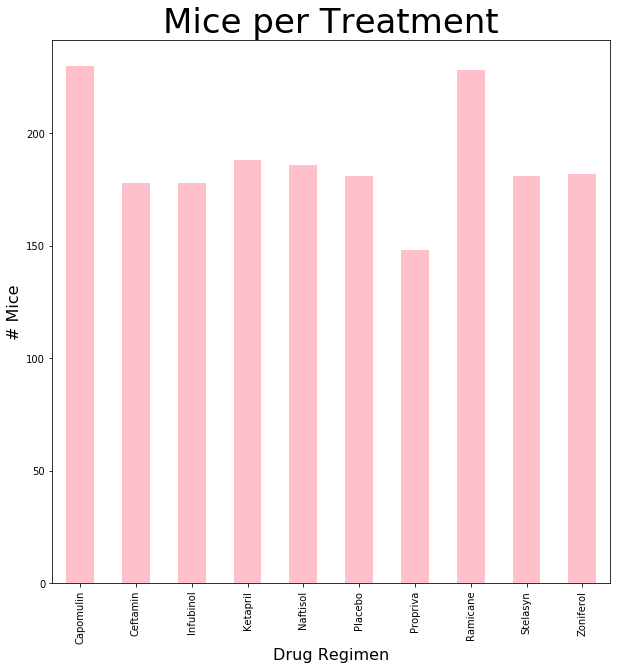

In [55]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
treatment = unique_df.groupby(['Drug Regimen']).count()['Mouse ID'].plot.bar(figsize=(10,10), color='pink')
treatment

plt.title("Mice per Treatment",fontsize = 34)
plt.xlabel("Drug Regimen",fontsize = 16)
plt.ylabel("# Mice",fontsize = 16)
plt.show()

Text(0, 0.5, '# Mice')

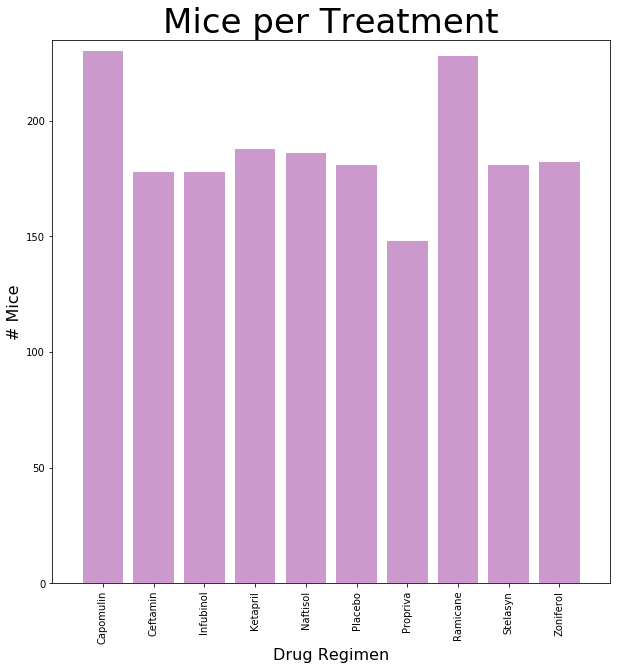

In [56]:
x_axis = np.arange(unique_df['Drug Regimen'].nunique())
y_axis = (unique_df.groupby(['Drug Regimen'])['Mouse ID'].count()).tolist()
fig1, ax1 = plt.subplots(figsize=(10, 10))
plt.bar(x_axis, y_axis, color='purple', alpha=0.4, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-1, len(x_axis))
plt.ylim(0, max(y_axis)+5)

plt.title('Mice per Treatment',fontsize = 34)
plt.xlabel('Drug Regimen',fontsize = 16)
plt.ylabel('# Mice',fontsize = 16)

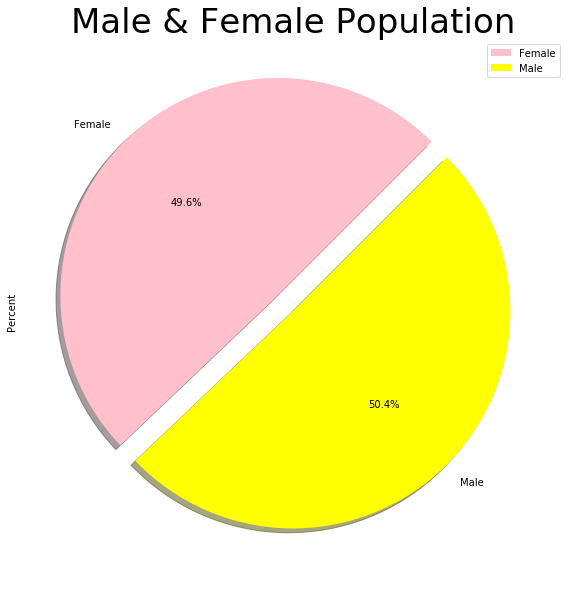

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_df = pd.DataFrame(unique_df.groupby(['Mouse ID','Sex']).size())
gender_df2 = pd.DataFrame(gender_df.groupby(['Sex']).count())
gender_df2.columns = ['Percent']
gender_df2['Percent'] = (gender_df2['Percent']/gender_df2['Percent'].sum())*100
#gender_df2

explode = (0.1, 0)
colors = ['pink', 'yellow']
plot = gender_df2.plot.pie(y='Percent',figsize=(15,10), colors = colors, startangle=45, explode = explode, shadow = True, autopct="%1.1f%%")
plt.title('Male & Female Population',fontsize = 34)
plt.show()

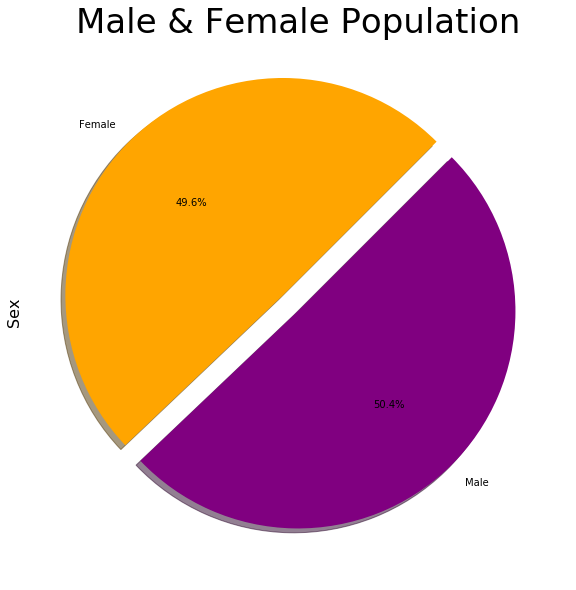

In [58]:
explode = (0.1, 0)
colors = ['orange', 'purple']

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.pie(gender_df2['Percent'], explode=explode, labels =['Female', 'Male'], colors=colors, autopct="%1.1f%%", shadow=True, startangle=45,)
plt.title('Male & Female Population',fontsize = 34)
plt.ylabel('Sex',fontsize = 16)
plt.show()

In [59]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_tr = unique_df.groupby('Mouse ID').max()['Timepoint']
max_tr = max_tr.reset_index()

vol_merge = pd.merge(max_tr, unique_df, on=("Mouse ID","Timepoint"),how="left")
#vol_merge = max_tr.merge(unique_df, on=("Mouse ID","Timepoint"),how="left")
vol_merge






,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [61]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol = []


for drug in drugs:
    vol_drugs = vol_merge.loc[vol_merge['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    tumor_vol.append(vol_drugs)
    
    quartiles = vol_drugs.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f'The lower quartile of {drug} is: {lowerq}')
    print(f'The upper quartile of {drug} is: {upperq}')
    print(f'The interquartile range of {drug} is: {iqr}')
    print(f'The the median of {drug} is: {quartiles[0.5]}')

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = vol_drugs.loc[(vol_drugs < lower_bound) | (vol_drugs >  upper_bound)]
    print(f'Values below {lower_bound} could be outliers, for {drug}.')
    print(f'Values above {upper_bound} could be outliers, for {drug}.')
    print(f'Outliers are: {outliers}')
    print('--------------------------------------------------------------')


The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.125164399999996
Values below 20.70456164999999 could be outliers, for Capomulin.
Values above 51.83201549 could be outliers, for Capomulin.
Outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
--------------------------------------------------------------
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229
Values below 17.912664470000003 could be outliers, for Ramicane.
Values above 54.30681135 could be outliers, for Ramicane.
Outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
--------------------------------------------------------------
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.525742

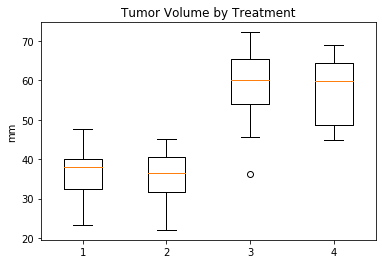

In [62]:
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume by Treatment')
ax1.set_ylabel('mm')
ax1.boxplot(tumor_vol)
plt.show()

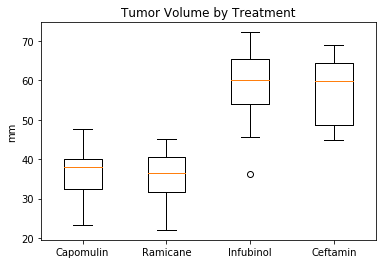

In [63]:

plt.boxplot(tumor_vol,labels = drugs)
plt.title('Tumor Volume by Treatment')
plt.ylabel('mm')
plt.show()

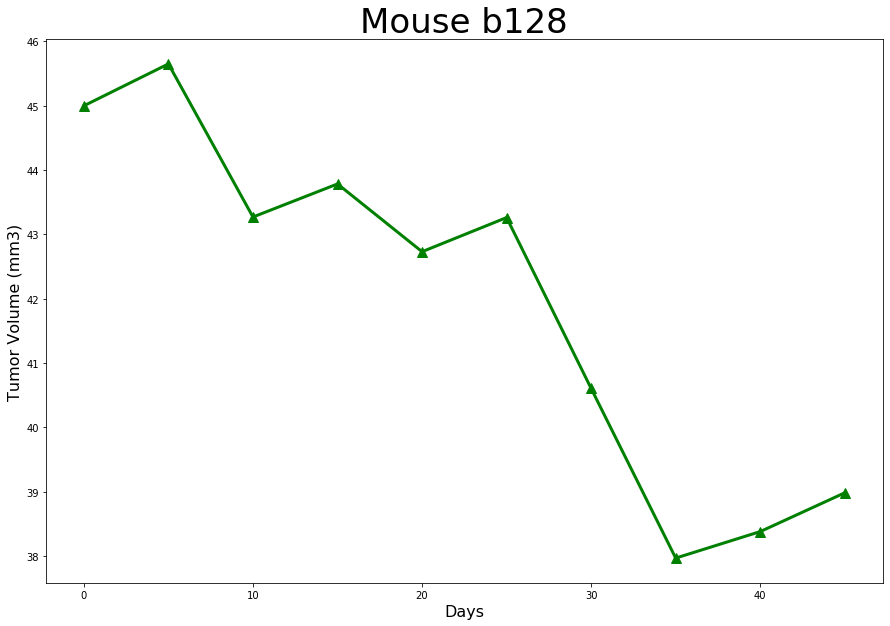

In [64]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capmouse = unique_df.loc[unique_df["Mouse ID"] == "b128",:]
x_axis = capmouse["Timepoint"]
tumor = capmouse["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.plot(x_axis, tumor,linewidth=3, markersize=10,marker="^",color="green")
plt.xlabel('Days',fontsize =16)
plt.ylabel('Tumor Volume (mm3)',fontsize =16)
plt.title('Mouse b128',fontsize =34)
plt.show()

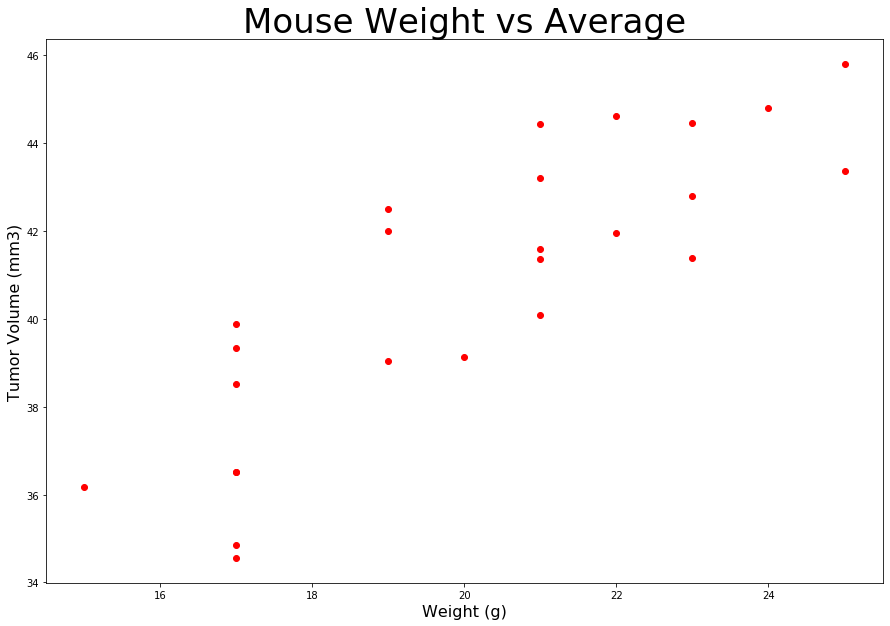

In [65]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
vol_drugs2 = unique_df.loc[unique_df['Drug Regimen'] == 'Capomulin', ['Mouse ID','Weight (g)','Tumor Volume (mm3)']]
weight_avg=vol_drugs2.groupby(['Mouse ID']).mean()

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.scatter(weight_avg['Weight (g)'],weight_avg['Tumor Volume (mm3)'],color="red")
plt.xlabel('Weight (g)',fontsize =16)
plt.ylabel('Tumor Volume (mm3)',fontsize =16)
plt.title('Mouse Weight vs Average',fontsize =34)
plt.show()

In [66]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_val = weight_avg['Weight (g)']
y_val = weight_avg['Tumor Volume (mm3)']
slope, intercept, rvalue, pvalue, stderr = linregress(x_val, y_val)
regress_val = x_val * slope + intercept

print(f"rvalue (Correlation coefficient):{rvalue}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)



rvalue (Correlation coefficient):0.8419363424694718
y = 0.95x + 21.55


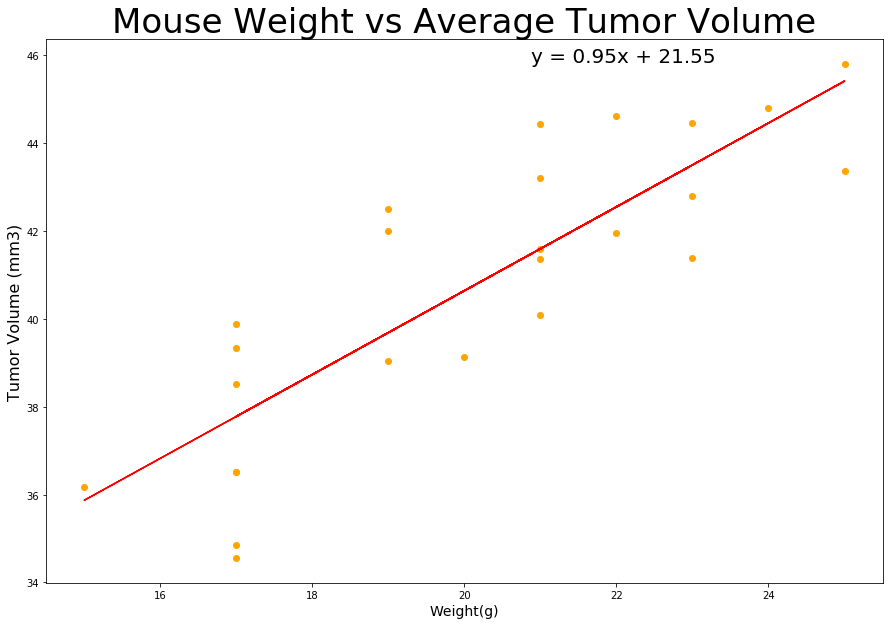

In [67]:
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.scatter(x_val,y_val, color="orange")
plt.plot(x_val,regress_val,"r-")
plt.xlabel('Weight(g)',fontsize =14)
plt.ylabel('Tumor Volume (mm3)',fontsize =16)
plt.title('Mouse Weight vs Average Tumor Volume',fontsize =34)
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='bottom',fontsize=20,color="black")
plt.show()